In [29]:
from sklearn import tree
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

In [30]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [31]:
titanik_data = pd.read_csv('train.csv')

In [32]:
X = titanik_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
X = X.fillna({'Age' : X.Age.median()})
X = pd.get_dummies(X)

In [33]:
y = titanik_data.Survived

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [36]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [37]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [38]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin' 

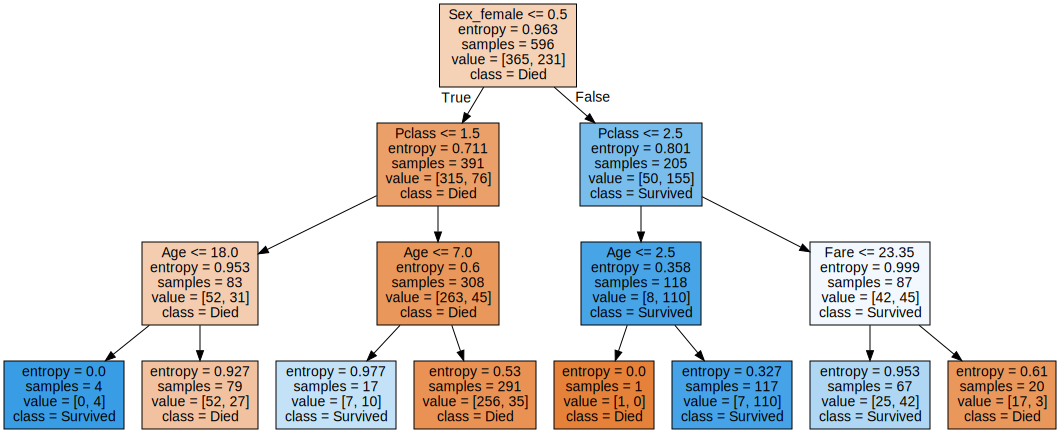

In [39]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                                   feature_names=list(X),
                                   class_names=['Died', 'Survived'],
                                   filled = True))
display(SVG(graph.pipe(format='svg')))

In [41]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=100)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=100)

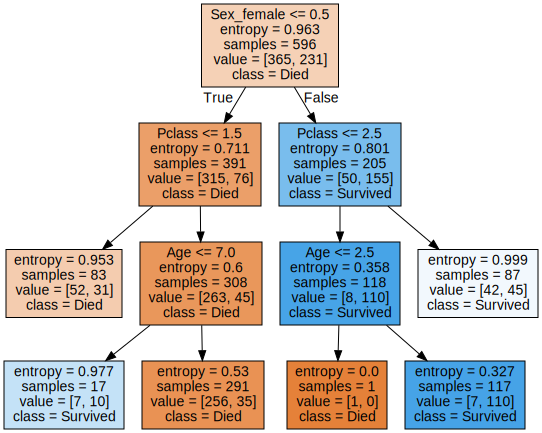

In [42]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                                   feature_names=list(X),
                                   class_names=['Died', 'Survived'],
                                   filled = True))
display(SVG(graph.pipe(format='svg')))

In [43]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=100, min_samples_leaf=10)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10,
                       min_samples_split=100)

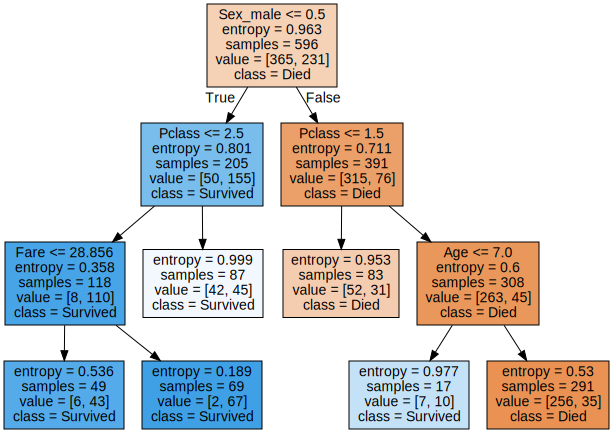

In [44]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                                   feature_names=list(X),
                                   class_names=['Died', 'Survived'],
                                   filled = True))
display(SVG(graph.pipe(format='svg')))